In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from causalimpact import CausalImpact

## Preparing data

In [2]:
df = pd.read_csv('Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2023.csv')

In [3]:
df = df[[#'Data As Of', 
    'Start Date', 
    #'End Date', 'Jurisdiction of Occurrence','Year', 'Month', 'All Cause', 'Natural Cause', 'Septicemia',
       #'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease',
       'Influenza and Pneumonia', 
    #'Chronic Lower Respiratory Diseases',
       #'Other Diseases of Respiratory System',
       #'Nephritis, Nephrotic Syndrome and Nephrosis',
       #'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
       #'Diseases of Heart', 'Cerebrovascular Diseases',
       #'Accidents (Unintentional Injuries)','Motor Vehicle Accidents',
       #'Intentional Self-Harm (Suicide)', 'Assault (Homicide)',
       #'Drug Overdose', 'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 
        #'flag_accid', 'flag_mva',
       #'flag_suic', 'flag_homic', 'flag_drugod'
]] 

In [4]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [5]:
df = df.dropna()

In [6]:
df = df[['Start Date', 'COVID-19 (Underlying Cause of Death)', 'Influenza and Pneumonia']]
df.head()

,Start Date,COVID-19 (Underlying Cause of Death),Influenza and Pneumonia
0,2020-01-01,4.0,6656.0
1,2020-02-01,20.0,6147.0
2,2020-03-01,6785.0,7579.0
3,2020-04-01,62014.0,5781.0
4,2020-05-01,35279.0,3612.0


## Visualizing data

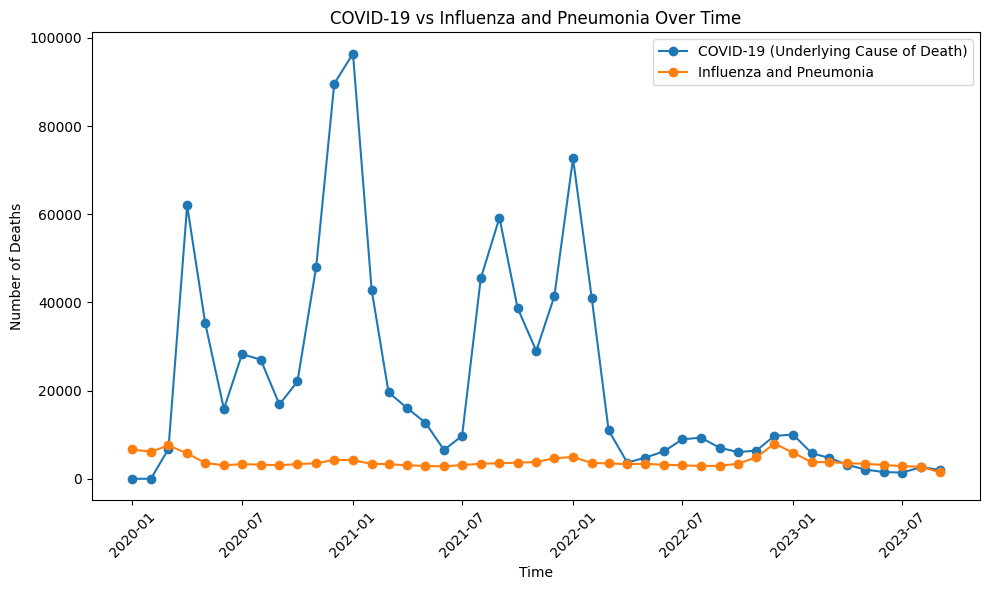

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Start Date'], df['COVID-19 (Underlying Cause of Death)'], label='COVID-19 (Underlying Cause of Death)', marker='o')
plt.plot(df['Start Date'], df['Influenza and Pneumonia'], label='Influenza and Pneumonia', marker='o')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 vs Influenza and Pneumonia Over Time')
plt.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.savefig('Fig_1.jpeg', format='jpeg', dpi=1200, bbox_inches='tight')
plt.show()

## Running the Analysis

In [8]:
# Set the breakpoint
breakpoint = '2021-02-01'
pre_period = [df['Start Date'].min(), pd.to_datetime(breakpoint) - pd.DateOffset(months=1)]
post_period = [pd.to_datetime(breakpoint), df['Start Date'].max()]

In [9]:
#  Bayesian Causal impact analysis
bayes_impact = CausalImpact(df.set_index('Start Date'), pre_period, post_period, estimation="pymc", model_args={"ndraws":3000, "nburn":300})

C:\Users\guiro\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\guiro\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: nseasons, standardize, model_args, estimation. After release 0.14, this will raise.
  warnings.warn(
C:\Users\guiro\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

In [10]:
# Summary Report
print(bayes_impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 16935.72. By contrast, in the absence of an
intervention, we would have expected an average response of 38623.66.
The 95% interval of this counterfactual prediction is [19427.22, 57666.33].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -21687.94 with a 95% interval of
[-40730.61, -2491.5]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 541943.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 1235957.13. The 95% interval of this prediction is [621670.96, 1845322.46].


The above results are given in terms of absolute numbers. In 

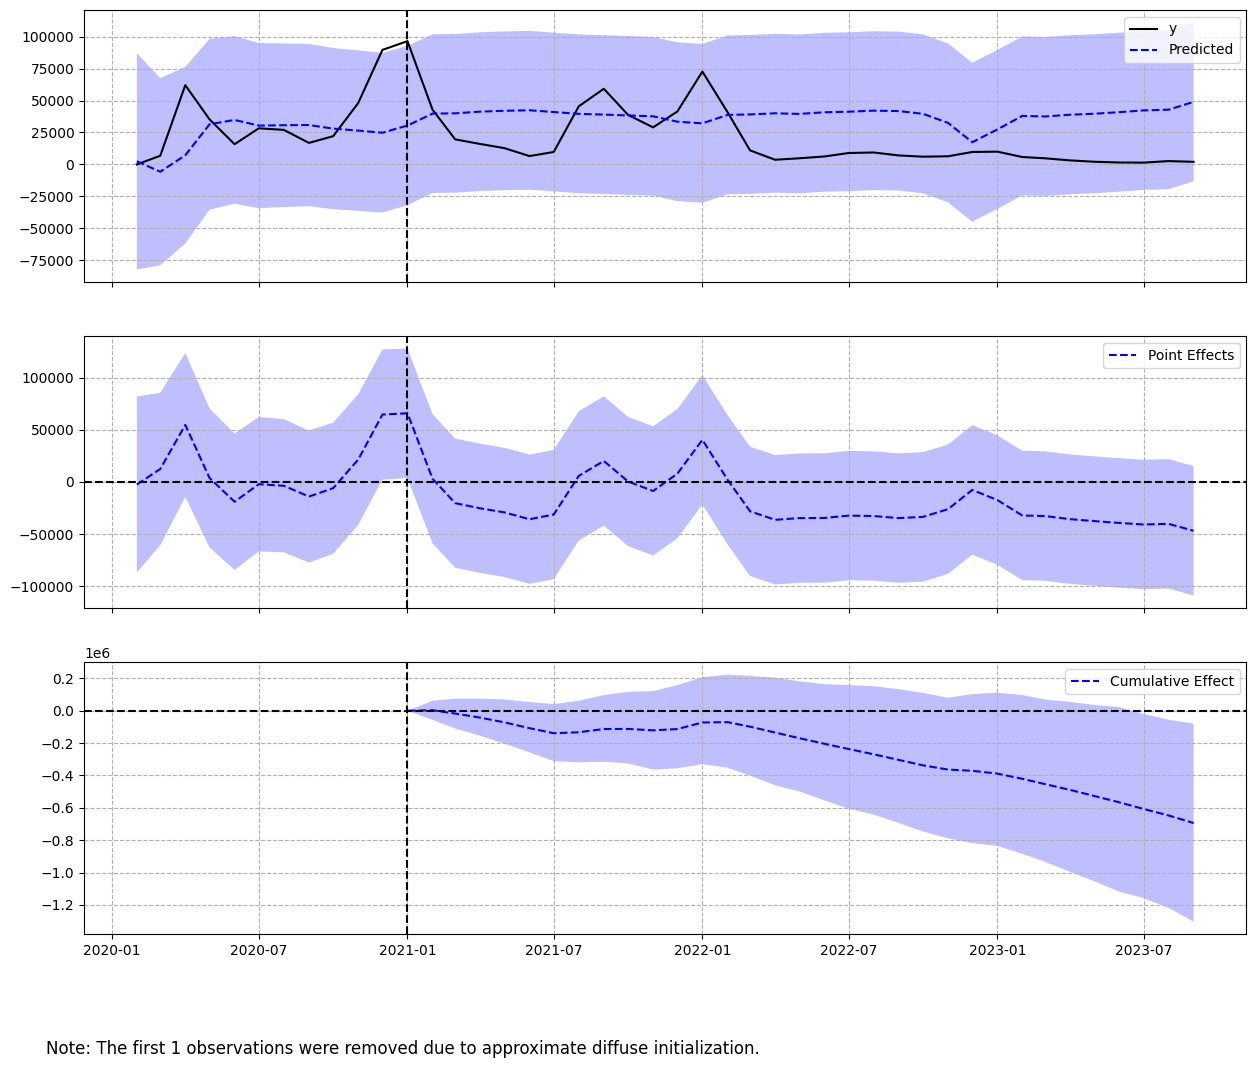

None


In [11]:
# Plot
print(bayes_impact.plot())

## Custom Plot

In [12]:
import inspect
print(inspect.getsource(bayes_impact.plot))

    def plot(self, panels=['original', 'pointwise', 'cumulative'], figsize=(15, 12)):
        """Plots inferences results related to causal impact analysis.

        Args
        ----
          panels: list.
            Indicates which plot should be considered in the graphics.
          figsize: tuple.
            Changes the size of the graphics plotted.

        Raises
        ------
          RuntimeError: if inferences were not computed yet.
        """
        plt = self._get_plotter()
        fig = plt.figure(figsize=figsize)
        if self.summary_data is None:
            raise RuntimeError('Please first run inferences before plotting results')

        valid_panels = ['original', 'pointwise', 'cumulative']
        for panel in panels:
            if panel not in valid_panels:
                raise ValueError(
                    '"{}" is not a valid panel. Valid panels are: {}.'.format(
                        panel, ', '.join(['"{}"'.format(e) for e in valid_panels])
      

In [42]:
 def plot2(self, panels=['original', 'pointwise', 'cumulative'], figsize=(15, 12)):
        """Plots inferences results related to causal impact analysis.

        Args
        ----
          panels: list.
            Indicates which plot should be considered in the graphics.
          figsize: tuple.
            Changes the size of the graphics plotted.

        Raises
        ------
          RuntimeError: if inferences were not computed yet.
        """
        plt = self._get_plotter()
        fig = plt.figure(figsize=figsize)
        if self.summary_data is None:
            raise RuntimeError('Please first run inferences before plotting results')

        valid_panels = ['original', 'pointwise', 'cumulative']
        for panel in panels:
            if panel not in valid_panels:
                raise ValueError(
                    '"{}" is not a valid panel. Valid panels are: {}.'.format(
                        panel, ', '.join(['"{}"'.format(e) for e in valid_panels])
                    )
                )

        # First points can be noisy due approximation techniques used in the likelihood
        # optimizaion process. We remove those points from the plots.
        llb = self.trained_model.filter_results.loglikelihood_burn
        inferences = self.inferences.iloc[llb:]

        intervention_idx = inferences.index.get_loc(self.post_period[0])
        n_panels = len(panels)
        ax = plt.subplot(n_panels, 1, 1)
        idx = 1

        if 'original' in panels:
            ax.plot(pd.concat([self.pre_data.iloc[llb:, 0], self.post_data.iloc[:, 0]]),
                    'k', label='y')
            ax.plot(inferences['preds'], 'r--', label='Predicted')
            ax.axvline(inferences.index[intervention_idx - 1], c='k', linestyle='--')
            ax.fill_between(
                self.pre_data.index[llb:].union(self.post_data.index),
                inferences['preds_lower'],
                inferences['preds_upper'],
                facecolor='gray',
                interpolate=True,
                alpha=0.25
            )
            ax.grid(False)
            ax.legend()
            if idx != n_panels:
                plt.setp(ax.get_xticklabels(), visible=False)
            idx += 1

        if 'pointwise' in panels:
            ax = plt.subplot(n_panels, 1, idx, sharex=ax)
            ax.plot(inferences['point_effects'], 'r--', label='Point Effects')
            ax.axvline(inferences.index[intervention_idx - 1], c='k', linestyle='--')
            ax.fill_between(
                inferences['point_effects'].index,
                inferences['point_effects_lower'],
                inferences['point_effects_upper'],
                facecolor='gray',
                interpolate=True,
                alpha=0.25
            )
            ax.axhline(y=0, color='g', linestyle='-')
            ax.grid(False)
            ax.legend()
            if idx != n_panels:
                plt.setp(ax.get_xticklabels(), visible=False)
            idx += 1

        if 'cumulative' in panels:
            ax = plt.subplot(n_panels, 1, idx, sharex=ax)
            ax.plot(inferences['post_cum_effects'], 'r--',
                    label='Cumulative Effect')
            ax.axvline(inferences.index[intervention_idx - 1], c='k', linestyle='--')
            ax.fill_between(
                inferences['post_cum_effects'].index,
                inferences['post_cum_effects_lower'],
                inferences['post_cum_effects_upper'],
                facecolor='gray',
                interpolate=True,
                alpha=0.25
            )
            ax.grid(False)
            ax.axhline(y=0, color='g', linestyle='-')
            ax.legend()

        # Alert if points were removed due to loglikelihood burning data
        if llb > 0:
            text = ('Note: The first {} observations were removed due to approximate '
                    'diffuse initialization.'.format(llb))
            fig.text(0.1, 0.01, text, fontsize='large')
        plt.savefig('Fig_2.jpeg', format='jpeg', dpi=1200, bbox_inches='tight')
        plt.show()

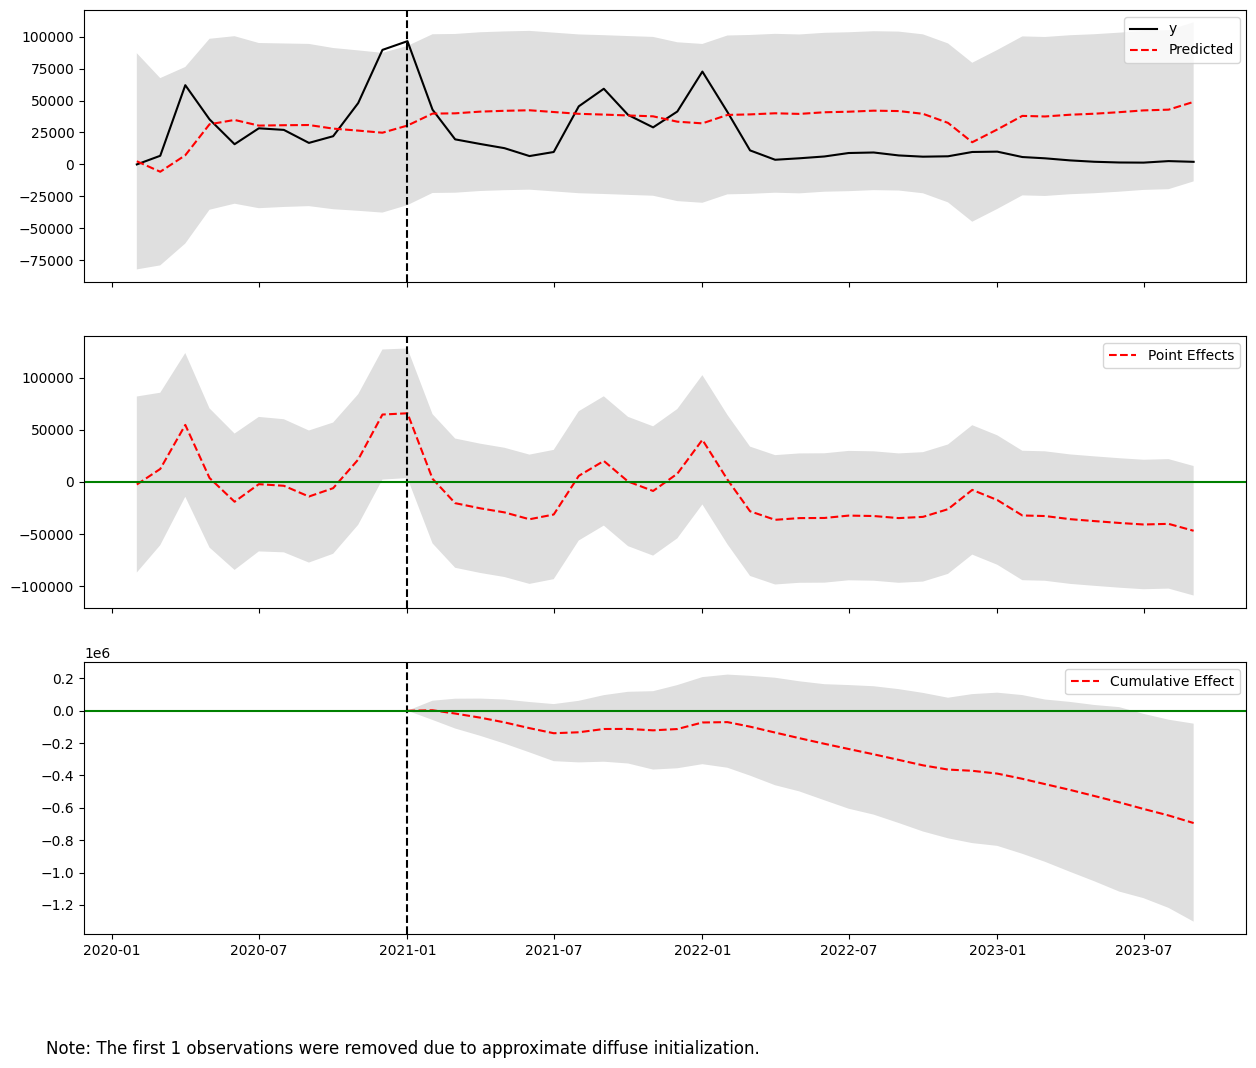

In [43]:
plot2(bayes_impact)